In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
%matplotlib inline

In [14]:
df = pd.read_csv("/kaggle/input/hr-analytics/HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [15]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [17]:
df.replace([-np.inf, np.inf], np.nan, inplace = True)

In [18]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [19]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [20]:
df["Department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [23]:
dfle = df
dfle.salary = le.fit_transform(dfle.salary)
dfle.Department = le.fit_transform(dfle.Department)
dfle

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,8,1
14995,0.37,0.48,2,160,3,0,1,0,8,1
14996,0.37,0.53,2,143,3,0,1,0,8,1
14997,0.11,0.96,6,280,4,0,1,0,8,1


Thus the data doesn't has any null or nan values but it had strings.
So the strings were converted into integers.

<h2 style="color:green" align="center">(2) Relationship between satisifaction level and Working hours of the employee, who left the organization</h2>

In [27]:
left_p = dfle[dfle.left != 0]
len(left_p)

3571

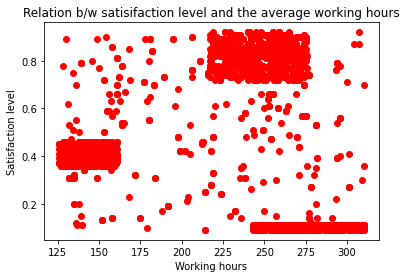

In [29]:
plt.title("Relation b/w satisifaction level and the average working hours")
plt.xlabel("Working hours")
plt.ylabel("Satisfaction level")
plt.scatter(left_p.average_montly_hours, left_p.satisfaction_level, color = 'red')

checking coorelation coefficient for the type of relation b/w satisifact ion level and the average working hours

In [30]:
corr = np.corrcoef(left_p.average_montly_hours, left_p.satisfaction_level)
corr

array([[ 1.        , -0.08411746],
       [-0.08411746,  1.        ]])

**From the graph and calculated correlation co-efficient, it is clearly seen that the relationship b/w average working hours and the satisifaction level is negative, and they are weakly related as the magnitude is close to zero**

<h2 style="color:green" align="center">(3)Effect of satisifaction level, department, promotion in last five years and salary level of employees, who have left the organization</h2>

In [31]:
new = dfle.drop(['last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident'], axis = 1)

In [32]:
new.corr()

,satisfaction_level,left,promotion_last_5years,Department,salary
satisfaction_level,1.000000,-0.388375,0.025605,0.003153,0.011754
left,-0.388375,1.000000,-0.061788,0.032105,-0.001294
promotion_last_5years,0.025605,-0.061788,1.000000,-0.027336,-0.001318
Department,0.003153,0.032105,-0.027336,1.000000,0.000685
salary,0.011754,-0.001294,-0.001318,0.000685,1.000000


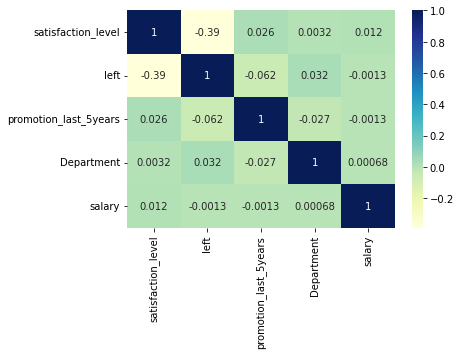

In [36]:
import seaborn as sb
dataplot = sb.heatmap(new.corr(), cmap="YlGnBu", annot=True)
plt.show()